In [1]:
from pymongo import MongoClient
from collections import OrderedDict

import matplotlib.pyplot as plt

In [2]:
client = MongoClient("192.168.0.21", 27017)
spot_collection = client.spectral_profiler.spot_data

In [3]:
spot_data = spot_collection.find_one()

# The REF data is stored as a string, so form a string assigning it as if it were a literal
# then call `exec` ro run the code, probably not the best method, but it works
python_string = 'plot_dict = ' + spot_data["REF1"]
exec(python_string)

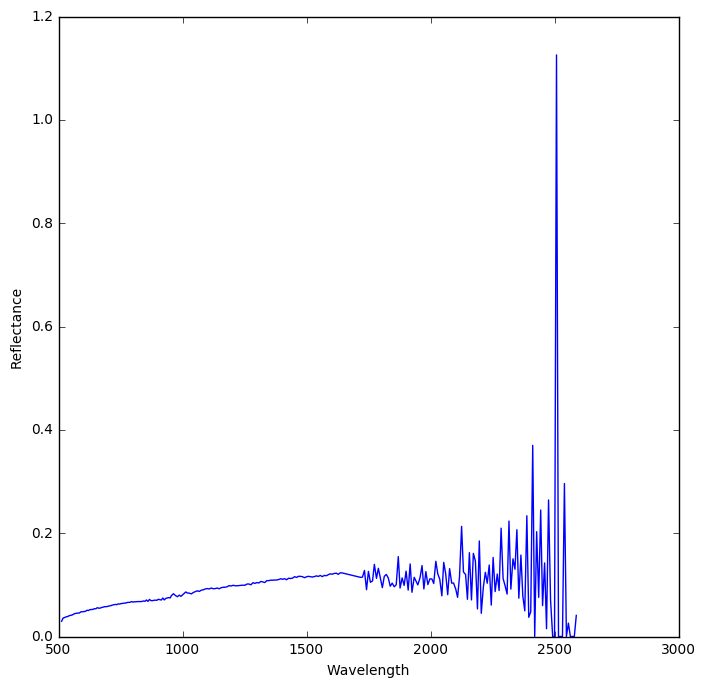

In [4]:
# Convert strings to numbers then sort the dict, this hacked method is expensive, do not recommend
wavelength = [float(w) for w in plot_dict.keys()]
list.sort(wavelength)
sorted_dict = OrderedDict((key, plot_dict[str(key)]) for key in wavelength)
reflectance = [ref for ref in sorted_dict.values()]

# plot it
plt.figure(figsize=(8,8))
plt.plot(wavelength, reflectance, color='b', linestyle='-', linewidth = 1, label='Wavelength')
plt.xlabel('Wavelength')
plt.ylabel('Reflectance')
plt.show()

In [5]:
spot_data["ancillarydata"]

'{"SPACECRAFT_CLOCK_COUNT":902206645.9406820536,"VIS_FOCAL_PLANE_TEMPERATURE":19.2000007629,"NIR1_FOCAL_PLANE_TEMPERATURE":16.4599990845,"NIR2_FOCAL_PLANE_TEMPERATURE":243.0,"SPECTROMETER_TEMPERATURE_1":16.7099990845,"SPECTROMETER_TEMPERATURE_2":20.0,"SPECTROMETER_TEMPERATURE_3":17.0499992371,"SPECTROMETER_TEMPERATURE_4":22.4200000763,"HALOGEN_BULB_RADIANCE":4.7589998245,"HALOGEN_BULB_VOLTAGE1":4.7589998245,"HALOGEN_BULB_VOLTAGE2":4.7589998245,"HALOGEN_BULB_TEMPERATURE1":7.8099999428,"HALOGEN_BULB_TEMPERATURE2":7.8099999428,"SPACECRAFT_ALTITUDE":100.4962005615,"SPACECRAFT_GROUND_SPEED":1.5443203449,"SUB_SPACECRAFT_LATITUDE":-70.7102994901,"SUB_SPACECRAFT_LONGITUDE":160.6294202187,"CENTER_LATITUDE":-70.7620361511,"CENTER_LONGITUDE":160.611921773,"EMISSION_ANGLE":0.9519629478,"SPACECRAFT_AZIMUTH":6.3752999306,"INCIDENCE_ANGLE":80.4272918701,"SOLAR_AZIMUTH_ANGLE":299.1752624512,"PHASE_ANGLE":80.0595397949,"SP_TEMPERATURE":19.7222003937,"SP_PELTIER_HOT_TEMPERATURE":-19.5622005463,"SP_N2_RA

In [13]:
# Get the image metadata for the file
spot_file = spot_data['file']
image_collection = client.spectral_profiler.image_data
image_data = image_collection.find_one({'file':spot_file})

In [16]:
image_data['SP_SPECTRUM_REF1']

{'IMAGE_VALUE_TYPE': 'REFLECTANCE',
 'LINES': 76,
 'LINE_SAMPLES': 296,
 'OFFSET': 0.0,
 'SAMPLE_BITS': 16,
 'SAMPLE_TYPE': 'MSB_UNSIGNED_INTEGER',
 'SCALING_FACTOR': 0.0001,
 'UNIT': 'ND'}

In [19]:
for key in image_data:
    print('* ' + key)

* LEVEL2B1_FILE_NAME
* LOCATION_FLAG
* PROGRAM_START_TIME
* TM_CORRECTED_SAMPLING_INTERVAL
* REV_STRIP_SCENE
* UPPER_LEFT_LONGITUDE
* ^SP_SPECTRUM_WAV
* PDS_VERSION_ID
* SP_SPECTRUM_REF1
* FILE_NAME
* ^SP_SPECTRUM_RAW
* LOWER_MARGIN_POINT_NUM
* TM_UPPER_RIGHT_LONGITUDE
* ^SP_SPECTRUM_REF1
* LOWER_RIGHT_LATITUDE
* LONG_EXPOSURE_DURATION
* UPPER_RIGHT_LONGITUDE
* C_AXIS_RADIUS
* PRODUCT_CREATION_TIME
* TM_LOWER_LEFT_LONGITUDE
* TM_SHADOWED_AREA_PIXEL_PERCENTAGE
* TM_CORRECTED_START_TIME
* ^ANCILLARY_AND_SUPPLEMENT_DATA
* SHORT_EXPOSURE_DURATION
* MOON_SUN_DISTANCE
* TM_UPPER_RIGHT_LATITUDE
* PRODUCER_ID
* SPACECRAFT_CLOCK_STOP_COUNT
* TM_UPPER_LEFT_LATITUDE
* VIS_SPECTRAL_COVERAGE
* SPICE_METAKERNEL_FILE_NAME
* _id
* TM_CORRECTED_STOP_TIME
* PROCESS_PARAMETER_FILE_NAME
* SPACECRAFT_CLOCK_START_COUNT
* TM_DATA_SET_NAME
* LOWER_RIGHT_LONGITUDE
* START_TIME
* PRODUCT_VERSION_ID
* TM_DEAD_PIXEL_PERCENTAGE
* SCENE_SEQUENCE_NUMBER
* STRIP_SEQUENCE_NUMBER
* TARGET_NAME
* EXPOSURE_MODE_ID
* INST